In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random
from dateutil.parser import parse


%matplotlib inline
import matplotlib as mpl
mpl.style.use("ggplot")

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

### Reading cleaned Data

In [2]:
data_folder = 'data/'

In [3]:
edges = pd.read_csv(data_folder + 'data_cleaned/edges.csv')
edges = edges.dropna(axis = 1, how = 'all')

addresses = pd.read_csv(data_folder + 'data_cleaned/addresses.csv')
addresses = addresses.dropna(axis = 1, how = 'all')

entities = pd.read_csv(data_folder + 'data_cleaned/entities.csv')
entities = entities.dropna(axis = 1, how = 'all')

intermediaries = pd.read_csv(data_folder + 'data_cleaned/intermediaries.csv')
intermediaries = intermediaries.dropna(axis = 1, how = 'all')

officers = pd.read_csv(data_folder + 'data_cleaned/officers.csv')
officers = officers.dropna(axis = 1, how = 'all')

**After reading the cleaned data, we want to have a general idea about the countries involved in Panama papers as we focalise our project about countries. The first plot is to see the top 20 countries involved in the different datasets. The idea is to have a general idea about the countries involved: if they are repeated in all datasets, if there is a country that dominates the plots, if they rich and developed or poor. Getting a clear idea about the countries may help us.**

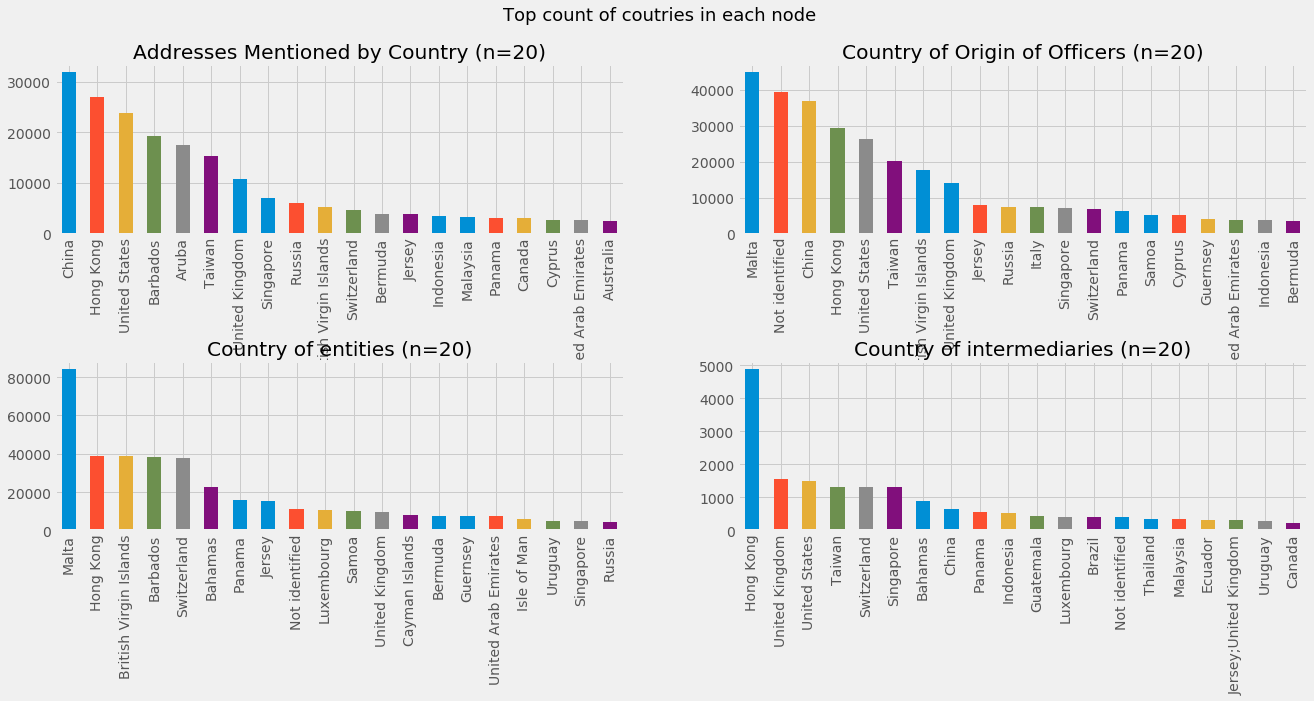

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

f, axarr = plt.subplots(2, 2, figsize=(20, 8))
f.subplots_adjust(hspace=0.75)
plt.suptitle('Top count of coutries in each node', fontsize=18)

#count of countries using Addresses
addresses['countries'].value_counts().head(20).plot.bar(
    title='Addresses Mentioned by Country (n=20)', ax=axarr[0][0]
)
# count of countries using Officers
officers['countries'].value_counts(dropna=True).head(20).plot.bar(
    title='Country of Origin of Officers (n=20)', ax=axarr[0][1]
)

# count of countries using entites
entities['countries'].value_counts(dropna=True).head(20).plot.bar(
    title='Country of entities (n=20)', ax=axarr[1][0]
)
# count of countries using intermediairies
intermediaries['countries'].value_counts(dropna=True).head(20).plot.bar(
    title='Country of intermediaries (n=20)',  ax=axarr[1][1]
)

**Different countries were involved here in the plots. There are countries that are present in the top 5 for all the datasets (Hong Kong). An important point here is that the top 20 countries do not seem to be poor countries. Tha majority of countries here are very rich (such as Swizterland and US). Also, countries came from the different world. It is not focalised near to Panama or just for American or Europeen countries. People all around the world had an issue with Panama papers.**

**This analysis assesses the role of the intermediaries (law firms, accounting firms, trust companies, banks, etc.) involved in the phases of the identified decision-making cycle (advice, creation, maintenance, enforcement). They played an important role to ensure a maximum of companies related to Panama papers. That's  why, we want to understand more about them and plot the 20 active intermediaries**

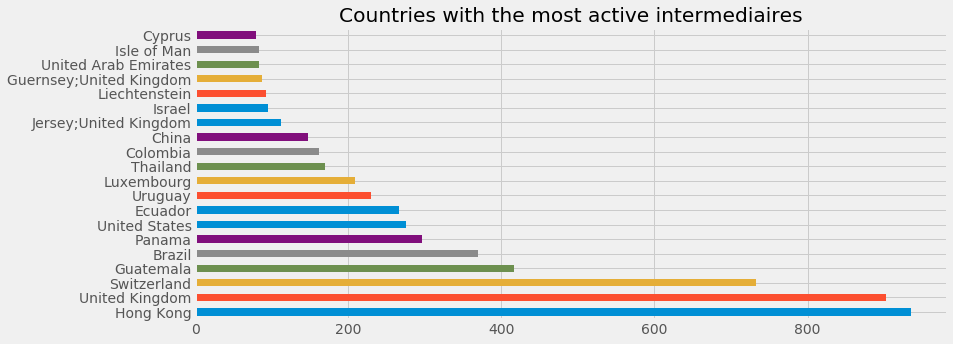

In [32]:
# Bar plot of most active intermediairies
intermediaries[intermediaries['status']== 'ACTIVE']['countries'].value_counts().head(20).plot.barh(
    title='Countries with the most active intermediaires', figsize=(12, 5)
)

**Mossack Fonseca worked with intermediaries in more than 100 countries all over the globe. Their most active clients by number of offshore company incorporations were from Hong Kong, the United Kingdom and Switzerland.**

**Tax havens are low-tax jurisdictions that offer businesses and individuals opportunities for tax avoidance, which is a very similar definition of an offshore jurisdiction. A plot representing the best Tax Heavens involved in Panama papers may be formative.**

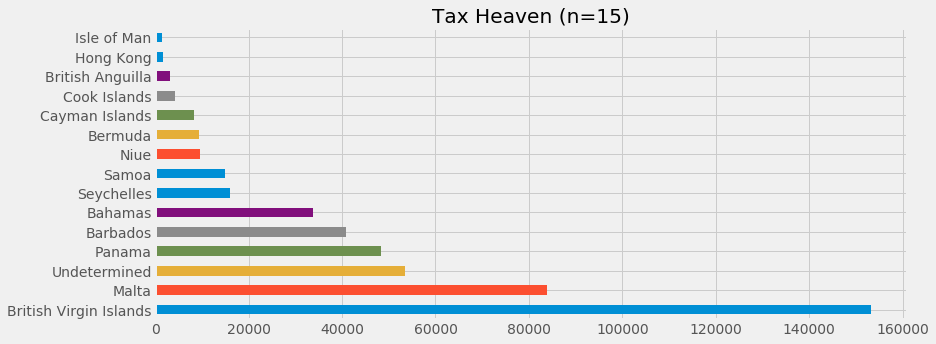

In [9]:
# barplot of the tax havens
entities['jurisdiction_description'].value_counts().head(15).plot.barh(title = ("Tax Havens (n=15)"), figsize=(12, 5))

**We will plot next the distribution of the evoluation of the incorposartions over the years. Which year was more relevant in the panama papers? When does officers heard about Mossack Fonseca?**


In [12]:
# We will plot next the distribution of the evoluation of the incorposartions over the years
entities_date = entities[['incorporation_date', 'inactivation_date']].copy()
entities_date.dropna(inplace= True)

entities_date['incorporation_date'] = entities_date['incorporation_date'].apply(lambda x: parse(x))
entities_date['inactivation_date'] = entities_date['inactivation_date'].apply(lambda x: parse(x))

entities_date['incorporation_date'] = entities_date['incorporation_date'].apply(lambda x : x.year)
entities_date['inactivation_date'] = entities_date['inactivation_date'].apply(lambda x : x.year)

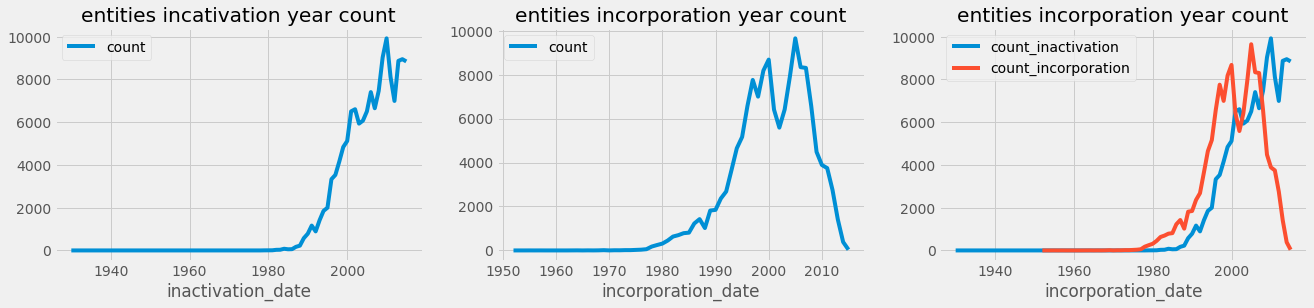

In [13]:
f, axarr = plt.subplots(1, 3, figsize=(20, 4))
f.subplots_adjust(hspace=0.75)

entities_date.groupby(['inactivation_date']).count().rename(columns= {'incorporation_date':'count'}).plot(
    title='entities incativation year count',  ax=axarr[0])

entities_date.groupby(['incorporation_date']).count().rename(columns= {'inactivation_date':'count'}).plot(
    title='entities incorporation year count',  ax=axarr[1])

entities_date.groupby(['inactivation_date']).count().rename(columns= {'incorporation_date':'count_inactivation'}).plot(
    title='entities incativation year count',  ax=axarr[2])

entities_date.groupby(['incorporation_date']).count().rename(columns= {'inactivation_date':'count_incorporation'}).plot(
    title='entities incorporation year count',  ax=axarr[2])



**As you can see above, the activity of the entities has increaded after the nineties. This is may be due the fact that the world has known a lot of devolopment and maybe also due to the digitalization of the world.**

**An other plot may be releavent, is the service provider.**

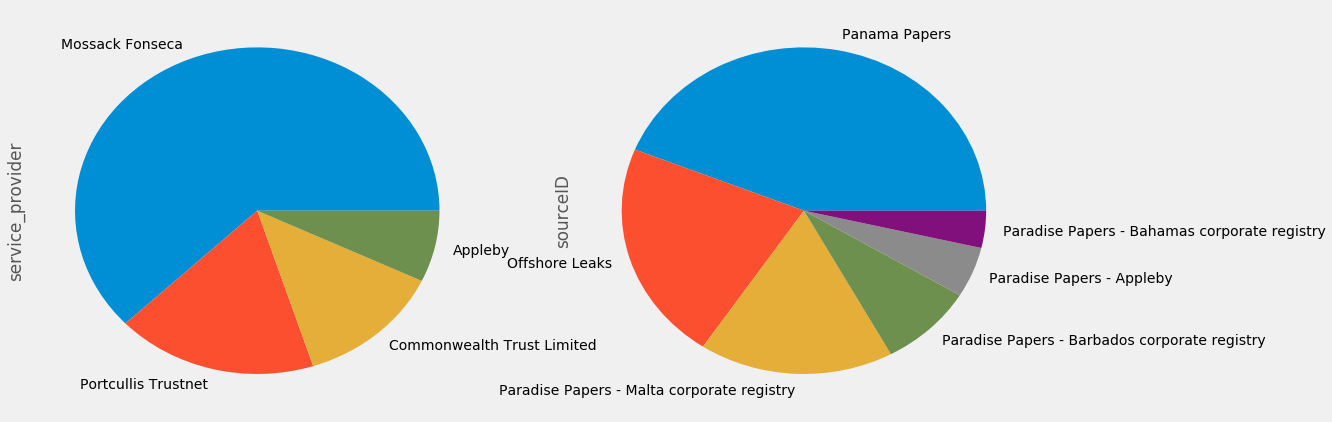

In [36]:
f, axarr = plt.subplots(1, 2, figsize=(16, 7))
f.subplots_adjust(hspace=0.75)

entities['service_provider'].value_counts().plot(kind='pie',  ax=axarr[0])
entities['sourceID'].value_counts()[:6].plot(kind='pie', ax= axarr[1])

In [37]:
# Select nodes, countries and country_code from all dataframes above and concat it with the edges in order to replace edges nodes with the countries 
entities_nodes = entities[['countries', 'country_codes', 'node_id', 'node_type']]

intermediaries_nodes = intermediaries[['countries', 'country_codes', 'node_id', 'node_type']]

officers_nodes = officers[['countries', 'country_codes', 'node_id', 'node_type']]

addresses_nodes= addresses[['countries', 'country_codes', 'node_id', 'node_type']]

nodes = pd.concat([entities_nodes , intermediaries_nodes , officers_nodes ,addresses_nodes], sort=True)


#edges = edges[edges['country_codes_start'].notnull()]
#edges = edges[edges['country_codes_end'].notnull()]

In [43]:
edges_countries = edges[['START_ID', 'END_ID', 'TYPE']].merge(nodes,how='left', left_on='START_ID', right_on='node_id').rename(columns= 
                                        {'countries':'countries_start', 'country_codes':'country_codes_start', 'node_id':'node_id_start'})
edges_countries = edges_countries[['START_ID','END_ID','countries_start','country_codes_start', 'node_id_start', 'TYPE']].merge(nodes,how='left', left_on='END_ID', 
                                                            right_on='node_id').rename(columns= 
                                        {'countries':'countries_end', 'country_codes':'country_codes_end'}).drop(['node_id_start', 'node_id'], axis= 1)

In [44]:
edges_countries.head()

,START_ID,END_ID,countries_start,country_codes_start,TYPE,countries_end,country_codes_end,node_type
0,10000035,14095990,Switzerland,CHE,registered_address,Switzerland,CHE,adresse
1,10000044,14091035,Hong Kong,HKG,registered_address,Hong Kong,HKG,adresse
2,10000055,14095990,Switzerland,CHE,registered_address,Switzerland,CHE,adresse
3,10000064,14091429,Andorra,AND,registered_address,Andorra,AND,adresse
4,10000089,14098253,Switzerland,CHE,registered_address,Switzerland,CHE,adresse


In [58]:
# We are going to focus our interest, entity, intermediaries, officers
edges_countries = edges_countries[edges_countries['node_type']!='adresse']
edges_countries = edges_countries[edges_countries['node_type'].notnull()]

In [61]:
edges_ = edges_countries[edges_countries['country_codes_start'].notnull()]
edges_ = edges_[edges_['country_codes_end'].notnull()]

In [63]:
edges_.head()

,START_ID,END_ID,countries_start,country_codes_start,TYPE,countries_end,country_codes_end,node_type
5310,11000001,10208879,South Africa,ZAF,intermediary_of,South Africa,ZAF,entity
5311,11000001,10198662,South Africa,ZAF,intermediary_of,South Africa,ZAF,entity
5312,11000001,10159927,South Africa,ZAF,intermediary_of,South Africa,ZAF,entity
5313,11000001,10165779,South Africa,ZAF,intermediary_of,South Africa,ZAF,entity
5314,11000001,10152967,South Africa,ZAF,intermediary_of,South Africa,ZAF,entity


In [ ]:
# create graph

G = nx.DiGraph()

for n,row in adds.iterrows():
    G.add_node(row.node_id, node_type="address", details=row.to_dict())
    
for n,row in ents.iterrows():
    G.add_node(row.node_id, node_type="entities", details=row.to_dict())
    
for n,row in inter.iterrows():
    G.add_node(row.node_id, node_type="intermediates", details=row.to_dict())
    
for n,row in offi.iterrows():
    G.add_node(row.node_id, node_type="officers", details=row.to_dict())
    
for n,row in edges.iterrows():
    G.add_edge(row.node_1, row.node_2, rel_type=row.rel_type, details={})

In [65]:
#########################3

In [69]:
edges_countries = edges_countries.groupby(['countries_start', 'country_codes_start']).count()[['START_ID']].rename(columns=
                                                                            {'START_ID': 'count'}).sort_values(['count'], ascending = False)

In [70]:
edges_countries.head()

,,count
countries_start,country_codes_start,
Hong Kong,HKG,185897
China,CHN,81448
Switzerland,CHE,79291
Thailand;British Virgin Islands;Indonesia;Singapore,THA;VGB;IDN;SGP,72732
Not identified,XXX,65760


In [74]:
#Corruption Perceptions Index dataframe 
cpi = pd.read_csv(data_folder + 'cpi.csv')
cpi = cpi[['CPI Rank', 'Country', 'Country Code', 'Corruption Perceptions Index (CPI)']]

In [75]:
cpi.head()

,CPI Rank,Country,Country Code,Corruption Perceptions Index (CPI)
0,1,New Zealand,NZL,90
1,1,Denmark,DNK,90
2,3,Finland,FIN,89
3,4,Sweden,SWE,88
4,5,Switzerland,CHE,86


In [79]:
fsi = pd.read_excel(data_folder + 'fsi.xlsx')

# the heigher the fsi score the more secretive the jurisdiction  
# Global Scale Weight5	 : take into account the jurisdiction's size and overall importance the global market of offshore financial service
fsi.drop(['FSI Value6', 'Narrative Report', 'FSI Share7'], axis=1, inplace= True)
fsi.rename(columns={'Secrecy Score4': 'secrecy_score','Global Scale Weight5':'global_scale'}, inplace= True)
# difference between cpi and fsi : https://www.financialsecrecyindex.com/infographics/FSI_vs_CPI-Final.pdf?fbclid=IwAR3xs9rvQopxfFB62025cFQgIflZtoonYLCKP9ykv4QvGJHie4LN-VoMfuY
fsi = fsi.dropna()
fsi.head()

,Rank,Jurisdiction,secrecy_score,global_scale
0,1,Switzerland2,76.450,0.045024
1,2,USA2,59.825,0.223024
2,3,Cayman Islands2,72.275,0.037856
3,4,Hong Kong2,71.050,0.041691
4,5,Singapore2,67.125,0.045783


In [80]:
# anti money laundring
aml = pd.read_csv(data_folder + 'aml.csv')

In [84]:
aml.drop(['ISO Code', 'Change in score 2017-2018'], axis = 1, inplace=True)

In [85]:
aml.head()

,Country,Ranking,Overall score,Iso3,Region,Income Group
0,Tajikistan,1,8.30,TJK,Europe & Central Asia,Lower middle income
1,Mozambique,2,8.28,MOZ,Sub-Saharan Africa,Low income
2,Afghanistan,3,8.28,AFG,South Asia,Low income
3,Laos,4,8.25,LAO,East Asia & Pacific,Lower middle income
4,Guinea-Bissau,5,8.16,GNB,Sub-Saharan Africa,Low income
